In [4]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.cm as cm

from rdkit import Chem, rdBase
from rdkit.Chem import PandasTools
print ('PANDAS version', pd.__version__)

# seaborn -- for better looking plots
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#sns.set_context("talk", rc={"lines.linewidth": 2})
sns.color_palette("pastel")

# rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdmolops
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem import rdMolDescriptors

# OpenEye
from __future__ import print_function

# import OE tools and data
import oenotebook as oenb
# oenb.capture_errors()
import warnings
warnings.filterwarnings("ignore")

from openeye.oechem import OECalculateMolecularWeight
from openeye.oemolprop import OEGetFractionCsp3, OEGetAromaticRingCount

('PANDAS version', u'0.21.0')
   OENotebook which rely on molecule depiction will be disabled


In [3]:
#df = oenb.read_file_to_dataframe("/home/btatsis/projects/Grace/ROCS/MolPort_ROCS-2000hits-logD.sdf")
#print(df.shape[0])
#df.head()

#df["MW"] = df.Molecule.apply(OECalculateMolecularWeight)
#df["NumAtoms"] = df.Molecule.apply(lambda x: x.NumAtoms())
#df["FractCsp3"] = df.Molecule.apply(OEGetFractionCsp3)
#df["AromRngCt"] = df.Molecule.apply(OEGetAromaticRingCount)

In [2]:
#fig = sns.pairplot(df[["MW", "AromRngCt", "Tanimoto"]], size=3, palette="husl");

#fig = sns.distplot(df['Tanimoto'], bins=25);

#fig.savefig('/home/btatsis/projects/Grace/Mcule_filtered.png',  dpi=300)

In [50]:
df1 = PandasTools.LoadSDF('/home/btatsis/projects/Grace/ROCS/eMol-shapeOnly-logD.sdf')
df1['LogD'] = df1['LogD'].astype(float)
#df1['ROCS_TanimotoCombo'] = df1['ROCS_TanimotoCombo'].astype(float) 
df1['ROCS_ShapeTanimoto'] = df1['ROCS_ShapeTanimoto'].astype(float) 

# Calculate physchem properties
df1['logP'] = df1['ROMol'].map(Descriptors.MolLogP)
df1['MW'] = df1['ROMol'].map(Descriptors.MolWt)
#df1['NumHeavyAtoms'] = df1.apply(lambda x: x['ROMol'].GetNumHeavyAtoms(), axis=1)
df1['HeavyAtomCount'] = df1['ROMol'].map(Descriptors.HeavyAtomCount)
df1['RingCount'] = df1['ROMol'].map(Descriptors.RingCount)
df1['TPSA'] = df1['ROMol'].map(Descriptors.TPSA)
#df1.info()
display(df1.describe())

,LogD,ROCS_ShapeTanimoto,logP,MW,HeavyAtomCount,RingCount,TPSA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.922164,0.711168,4.090678,442.543508,31.697000,4.038500,78.483680
std,1.806359,0.014355,1.392062,47.492869,3.346908,0.910732,23.080235
min,-3.480176,0.696000,-1.515700,316.425000,23.000000,1.000000,6.480000
25%,2.725014,0.701000,3.168950,407.200750,29.000000,3.000000,62.100000
50%,3.998658,0.707000,4.295830,442.515500,31.000000,4.000000,75.510000
75%,5.330887,0.717000,5.119400,476.622000,34.000000,5.000000,91.380000
max,8.195642,0.799000,6.996700,549.397000,40.000000,7.000000,171.290000


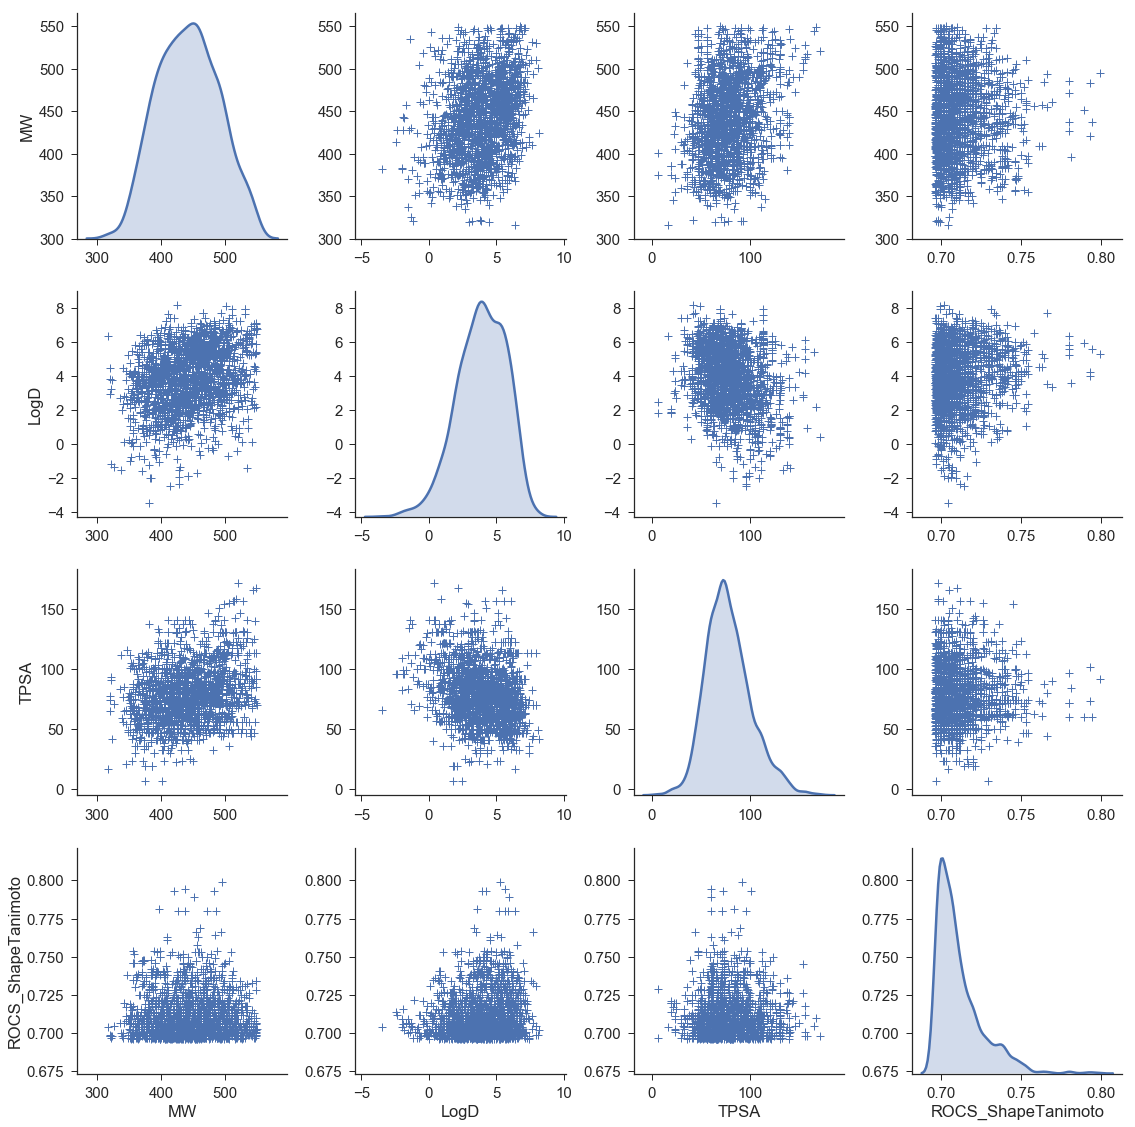

In [51]:
#fig = sns.pairplot(df1[["MW", "logP", 'Tanimoto']], size=5, palette="husl");
#display(df1.head())
#fig = sns.pairplot(df1[(df1['MW']<1000)][['MW', 'logP', 'TPSA','ROCS_TanimotoCombo']], size=4, palette="hus1");
#fig = sns.pairplot(df1[['MW', 'LogD', 'ROCS_ShapeTanimoto']], size=4, palette="pastel"); 
#fig = sns.pairplot(df1[['MW', 'LogD', 'ROCS_ShapeTanimoto']], size=4, palette="pastel", diag_kind="kde")

g = sns.pairplot(df1[['MW', 'LogD', 'TPSA', 'ROCS_ShapeTanimoto']], size=4, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

#fig.savefig('/home/btatsis/projects/Grace/ROCS/eMol-shapeOnly.png',  dpi=300)
g.savefig('/home/btatsis/projects/Grace/ROCS/eMol_ShapeOnly.png',  dpi=300)